In [ ]:
!pip install mxnet
!pip install --upgrade gluoncv
!pip install mxnet-cu101

     |████████████████████████████████| 46.9 MB 2.0 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 1.3 MB 5.4 MB/s 
     |████████████████████████████████| 356.7 MB 33 kB/s 


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -a /content/drive/MyDrive/issue-1/ /content/sample_data/

In [ ]:
!cp -a /content/drive/MyDrive/content/im2rec.py /content/sample_data/issue-1/

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sample_data/issue-1/Images.zip', 'r')
zip_ref.extractall('/content/sample_data/issue-1/Images/')

In [ ]:
%cd /content/sample_data/issue-1

/content/sample_data/issue-1


In [ ]:
%mkdir checkpoints
%mkdir train
%mkdir test
%mkdir dev

In [ ]:
%ls

checkpoints/  dev/  im2rec.py  Images/  Images.zip  test/  train/


In [ ]:
Animal_map = {
    'cheetah': [],
    'Hyena': []
}

Animal_to_idx = {
    'cheetah': 0,
    'Hyena': 1
}
data_dir = 'Images/train/cheetah'
fnames = os.listdir(data_dir)
counter = 0
for fn in fnames:
    Animal_map["cheetah"].append({
        'idx': counter,
        'label': Animal_to_idx["cheetah"],
        'filename': fn,
    })
    counter += 1
data_dir = 'Images/train/hyena'
fnames = os.listdir(data_dir)
for fn in fnames:
    Animal_map["Hyena"].append({
        'idx': counter,
        'label': Animal_to_idx["Hyena"],
        'filename': fn,
    })
    counter += 1

for k in Animal_map:
    print(k, len(Animal_map[k]))


cheetah 900
Hyena 900


In [ ]:
Animal_map2 = {
    'cheetah': [],
    'Hyena': []
}

Animal_to_idx2 = {
    'cheetah': 0,
    'Hyena': 1
}
data_dir = 'Images/validation/cheetah'
fnames = os.listdir(data_dir)
counter = 0
for fn in fnames:
    Animal_map2["cheetah"].append({
        'idx': counter,
        'label': Animal_to_idx2["cheetah"],
        'filename': fn,
    })
    counter += 1
data_dir = 'Images/validation/hyena'
fnames = os.listdir(data_dir)
for fn in fnames:
    Animal_map2["Hyena"].append({
        'idx': counter,
        'label': Animal_to_idx2["Hyena"],
        'filename': fn,
    })
    counter += 1

for k in Animal_map2:
    print(k, len(Animal_map2[k]))


cheetah 100
Hyena 100


In [ ]:
import random as rd
rd.shuffle(Animal_map["cheetah"])
rd.shuffle(Animal_map["Hyena"])

In [ ]:
def write_lst(image_arr, base_dir, file_path):
    with open(file_path, 'w') as f:
        count = 0
        for img in image_arr:
            label = img['label']
            if(img['label']==0):
              bs=os.path.join(base_dir,'cheetah')
            else:
              bs=os.path.join(base_dir,'hyena')
            img_path = os.path.join(bs, img['filename'])
            new_line = '\t'.join([str(count), str(label), str(img_path)])
            new_line += '\n'
            f.write(new_line)
            count += 1
min_data_len = min(len(Animal_map['cheetah']),len(Animal_map['Hyena']))
min_data_len2 = min(len(Animal_map2['cheetah']),len(Animal_map2['Hyena']))
train = (0, int(min_data_len * 0.9))
dev = (int(min_data_len * 0.90), int(min_data_len * 1))
test = (0, int(min_data_len2 * 1))
def split_dataset(from_idx, to_idx):
    return Animal_map['cheetah'][from_idx: to_idx] +Animal_map['Hyena'][from_idx: to_idx];
def split_dataset2(from_idx, to_idx):
    return Animal_map2['cheetah'][from_idx: to_idx] +Animal_map2['Hyena'][from_idx: to_idx];
train_set = split_dataset(train[0], train[1])
write_lst(train_set, 'Images/train', 'train/Animal.lst')
dev_set = split_dataset(dev[0], dev[1])
write_lst(dev_set, 'Images/train', 'dev/Animal.lst')
test_set = split_dataset2(test[0], test[1])
write_lst(test_set, 'Images/validation', 'test/Animal.lst')

In [ ]:
!python im2rec.py ./train . --center-crop --resize 224 --pack-label
!python im2rec.py ./dev . --center-crop --resize 224 --pack-label
!python im2rec.py ./test . --center-crop --resize 224 --pack-label

Creating .rec file from /content/sample_data/issue-1/train/Animal.lst in /content/sample_data/issue-1/train
multiprocessing not available, fall back to single threaded encoding
time: 0.04036903381347656  count: 0
time: 5.09489893913269  count: 1000
Creating .rec file from /content/sample_data/issue-1/dev/Animal.lst in /content/sample_data/issue-1/dev
multiprocessing not available, fall back to single threaded encoding
time: 0.00510096549987793  count: 0
Creating .rec file from /content/sample_data/issue-1/test/Animal.lst in /content/sample_data/issue-1/test
multiprocessing not available, fall back to single threaded encoding
time: 0.0057947635650634766  count: 0


In [ ]:
from mxnet import init
import mxnet as mx
import gluoncv

model_name = 'ResNext50_32x4d'

# download and load the pre-trained model
pretrained_net = gluoncv.model_zoo.get_model(model_name, pretrained=True)

net = gluoncv.model_zoo.get_model(model_name, classes=2)
net.features = pretrained_net.features
net.output.initialize(init.Xavier(magnitude=2.24))
print(net)

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


56430KB [00:01, 30997.93KB/s]                           


ResNext(
  (features): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (4): HybridSequential(
      (0): Block(
        (body): HybridSequential(
          (0): Conv2D(64 -> 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
          (2): Activation(relu)
          (3): Conv2D(4 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
          (5): Activation(relu)
          (6): Conv2D(128 -> 256, kernel_size=(1

In [ ]:
from mxnet.image import color_normalize
from mxnet import image

train_augs = [
    image.ResizeAug(224),
    image.HorizontalFlipAug(0.5),  # flip the image horizontally
    image.BrightnessJitterAug(.3), # randomly change the brightness
    image.HueJitterAug(.1)         # randomly change hue
]
test_augs = [
    image.ResizeAug(224)
]

def transform(data, label, augs):
    data = data.astype('float32')
    for aug in augs:
        data = aug(data)
    data = nd.transpose(data, (2,0,1))
    return data, nd.array([label]).asscalar().astype('float32')

from mxnet.gluon.data.vision import ImageRecordDataset
train_rec = 'train/Animal.rec'
dev_rec = 'dev/Animal.rec'
test_rec = './test/Animal.rec'

trainIterator = ImageRecordDataset(
    filename=train_rec, 
    transform=lambda X, y: transform(X, y, train_augs)
)
devIterator = ImageRecordDataset(
    filename=dev_rec,
    transform=lambda X, y: transform(X, y, test_augs)
)
testIterator = ImageRecordDataset(
    filename=test_rec,
    transform=lambda X, y: transform(X, y, test_augs)
)

In [ ]:
import time
from mxnet.image import color_normalize
from mxnet import autograd
import mxnet as mx
from mxnet import nd

def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        prediction = nd.argmax(output, axis=1)
        acc.update(preds=prediction, labels=label)
    return acc.get()[1]

def metric_str(names, accs):
    return ', '.join(['%s=%f'%(name, acc) for name, acc in zip(names, accs)])

def train_util(net, train_iter, dev_iter, loss_fn, trainer, ctx, epochs, batch_size):
    metric = mx.metric.create(['acc'])
    for epoch in range(epochs):
        for i, (data, label) in enumerate(train_iter):
            st = time.time()
            # ensure context            
            data = data.as_in_context(ctx)
            label = label.as_in_context(ctx)
            with autograd.record():
                output = net(data)
                loss = loss_fn(output, label)

            loss.backward()
            trainer.step(data.shape[0])
            
            #  Keep a moving average of the losses
            metric.update([label], [output])
            names, accs = metric.get()
            # print('[Epoch %d Batch %d] speed: %f samples/s, training: %s'%(epoch, i, batch_size/(time.time()-st), metric_str(names, accs)))
            if i%100 == 0:
                net.collect_params().save('checkpoints/%d-%d.params'%(epoch, i))

        train_acc = evaluate_accuracy(train_iter, net)
        dev_acc = evaluate_accuracy(dev_iter, net)
        print("Epoch %s | training_acc %s | dev_acc %s " % (epoch, train_acc, dev_acc))

In [ ]:
def train(net, ctx, 
          batch_size=64, epochs=5, learning_rate=0.01, wd=0.002):
    train_data = gluon.data.DataLoader(
        trainIterator, batch_size, shuffle=True)
    dev_data = gluon.data.DataLoader(
        devIterator, batch_size, shuffle=True)

    net.collect_params().reset_ctx(ctx)
    net.hybridize()
    
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate, 'wd': wd})
    
    train_util(net, train_data, dev_data,loss, trainer, ctx, epochs, batch_size)

In [ ]:

from mxnet import gluon
import mxnet as mx

ctx = mx.gpu(0)
train(net, ctx, batch_size=64, epochs=6, learning_rate=0.01)

Epoch 0 | training_acc 0.9993827160493827 | val_acc 1.0 
Epoch 1 | training_acc 0.9993827160493827 | val_acc 1.0 
Epoch 2 | training_acc 1.0 | val_acc 1.0 
Epoch 3 | training_acc 1.0 | val_acc 1.0 
Epoch 4 | training_acc 1.0 | val_acc 1.0 
Epoch 5 | training_acc 1.0 | val_acc 1.0 


In [ ]:
test_data_loader = gluon.data.DataLoader(testIterator, 64)
test_acc = evaluate_accuracy(test_data_loader, net)
print(test_acc)

0.995


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def predict_weather(net, fname):
    with open(fname, 'rb') as f:
        img = image.imdecode(f.read())
    data, _ = transform(img, -1, test_augs)
    plt.imshow(data.transpose((1,2,0)).asnumpy())
    data = data.expand_dims(axis=0)
    out = net(data.as_in_context(mx.gpu()))
    plt.imshow(img.asnumpy())
    pred, label = get_label_and_prod(out)
    print('Pred: %s'% label)

def get_label_and_prod(out):
    labels = ['cheetah','Hyena']
    pred = int(nd.argmax(out, axis=1).asscalar())
    return pred, labels[pred]

Pred: Hyena


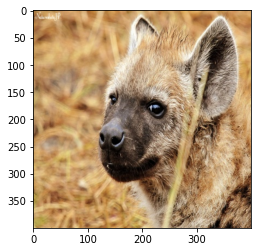

In [ ]:
predict_weather(net, 'Images/validation/hyena/hyena_000_val_resized.jpg')

Pred: cheetah


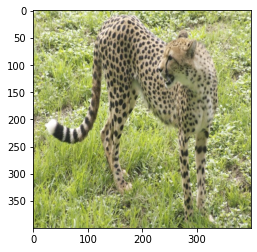

In [ ]:
predict_weather(net, 'Images/validation/cheetah/cheetah_079_val_resized.jpg')

In [ ]:
%ls

checkpoints/  dev/  im2rec.py  Images/  Images.zip  test/  train/
